In [274]:
## Imprt all the require libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
import time
from sklearn.metrics import plot_confusion_matrix,roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle
from sklearn.model_selection import GridSearchCV
import itertools as it
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from itertools import cycle
from imblearn.over_sampling import SMOTE
# Import label encoder
from sklearn import preprocessing
import optuna
import optuna.visualization as vis
%matplotlib inline

# Import Data 

In [275]:
data=pd.read_csv("bank-additional-full.csv",sep=';')

## First Five rows of Dataset

In [276]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [277]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Exploratory Data Ananlysis

In [278]:
print(f'shape of our dataset is {data.shape}')
print(f'There are {data.shape[0]} examples and {data.shape[1]-1} features with one output')

shape of our dataset is (41188, 21)
There are 41188 examples and 20 features with one output


In [279]:
## Decription of numerical data in dataset
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# data.info give following information
* number of columns
* column labels
* column data types
* memory usage
* range index
* the number of cells in each column (non-null values)

In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Univariate Analysis

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

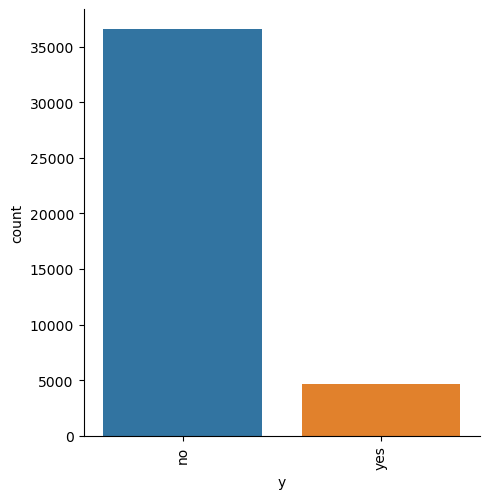

In [281]:
plt.style.use('default')
sns.catplot(x='y',data=data,kind='count')
plt.xticks(rotation=90)

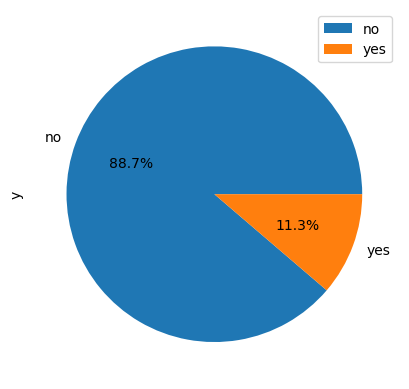

<Figure size 640x480 with 0 Axes>

In [282]:
plt.style.use('default')
pie_MS_M=pd.DataFrame(data['y'].value_counts())
pie_MS_M.plot.pie(subplots=True,labels=pie_MS_M.index.values,autopct='%1.1f%%')
plt.show()
plt.savefig("pie_cahrt.jpg")

### 88.7% of the examples are customer who is not gonna subscibe which the data is not balance

# Research Questions
* What is the effect of contact frequency and duration on the success of marketing campaigns?

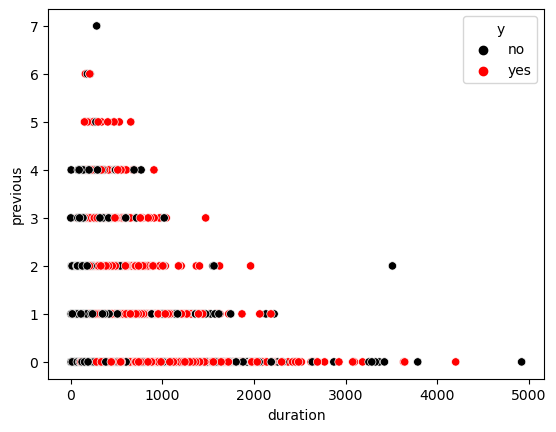

In [283]:
plt.style.use('default')
hue_color={'no':'black',
          'yes':'red'}
sns.scatterplot(x='duration',y='previous',hue='y',data=data,palette=hue_color)
plt.show()

* How does the success of marketing campaigns vary across different age groups and education levels?

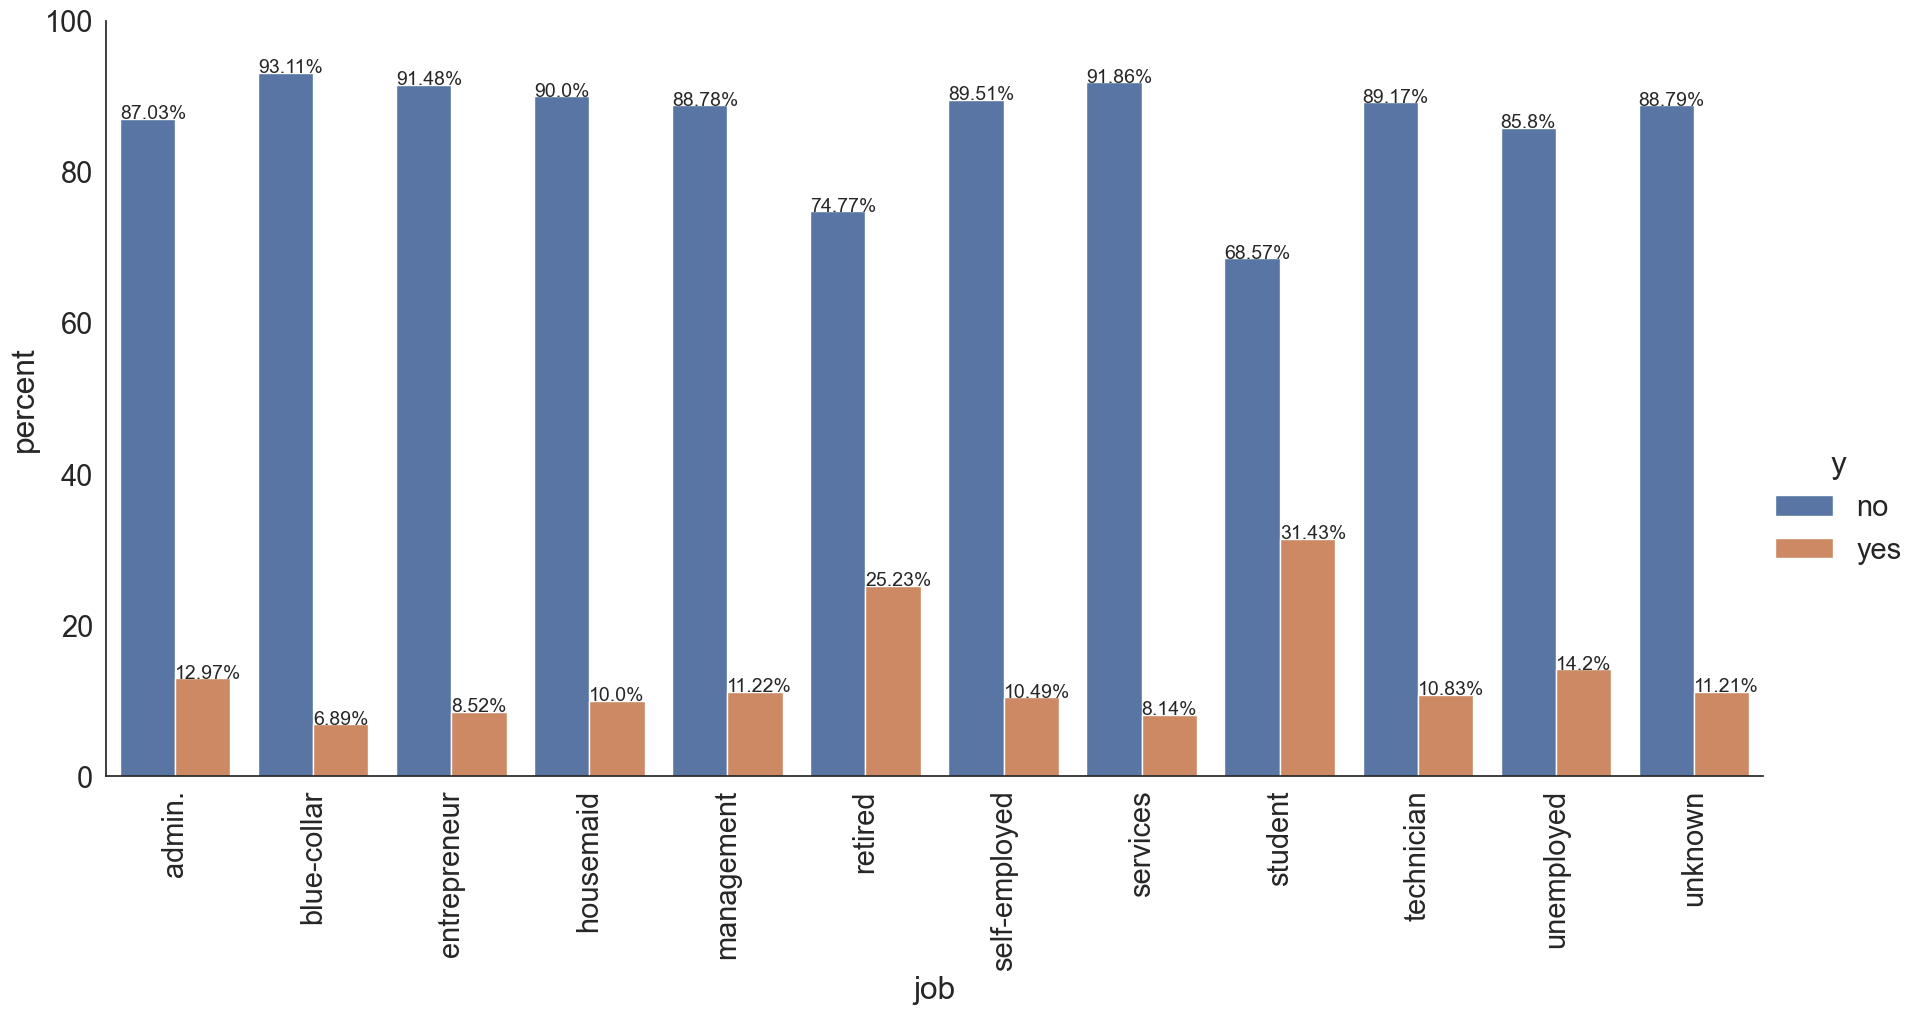

In [284]:
x,y = 'job', 'y'
sns.set_theme(style = "white", font_scale= 1.9)
df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=9,aspect=2)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt,fontsize=14)
    plt.xticks(rotation=90)

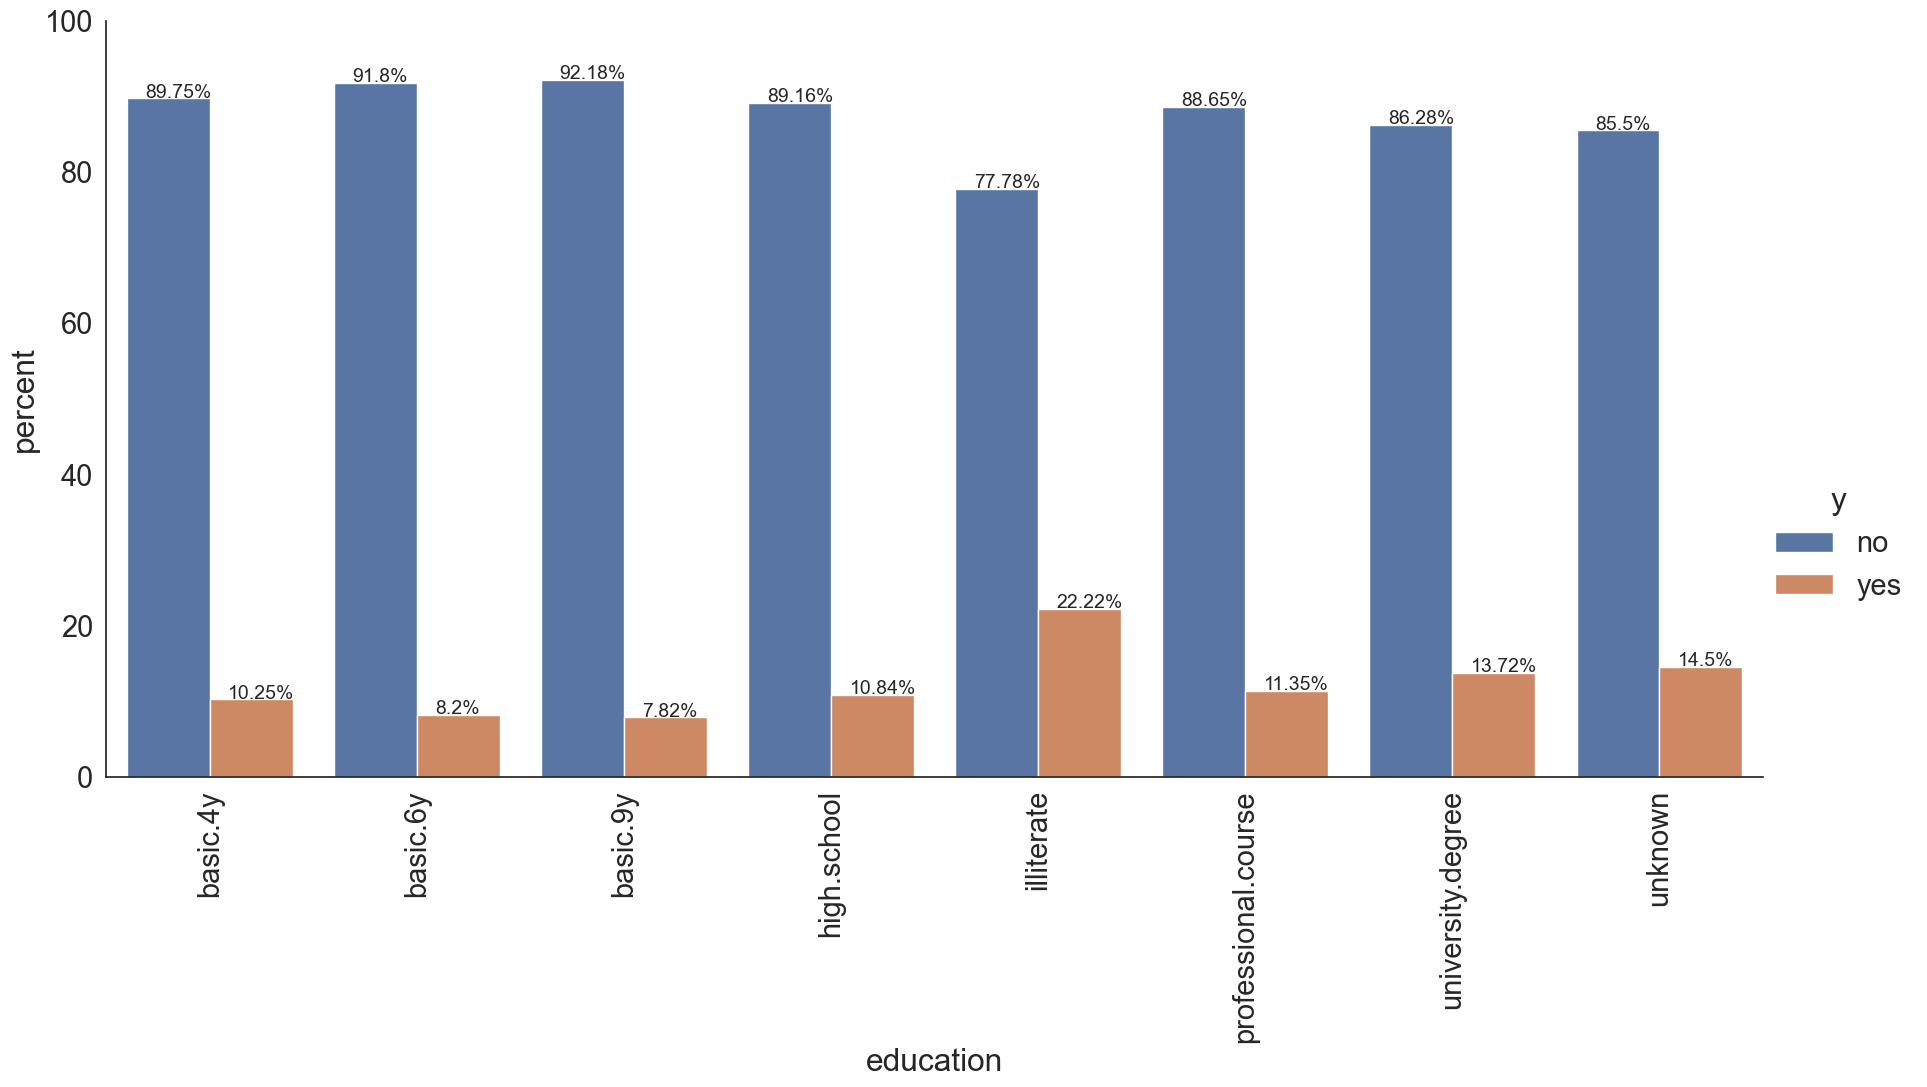

In [285]:
x,y = 'education', 'y'
sns.set_theme(style = "white", font_scale= 1.9)
df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=9,aspect=2)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x+0.09,txt_y+0.1,txt,fontsize=14)
    plt.xticks(rotation=90)

* Are there differences in the success rates of marketing campaigns conducted during different times of the year or in different seasons?

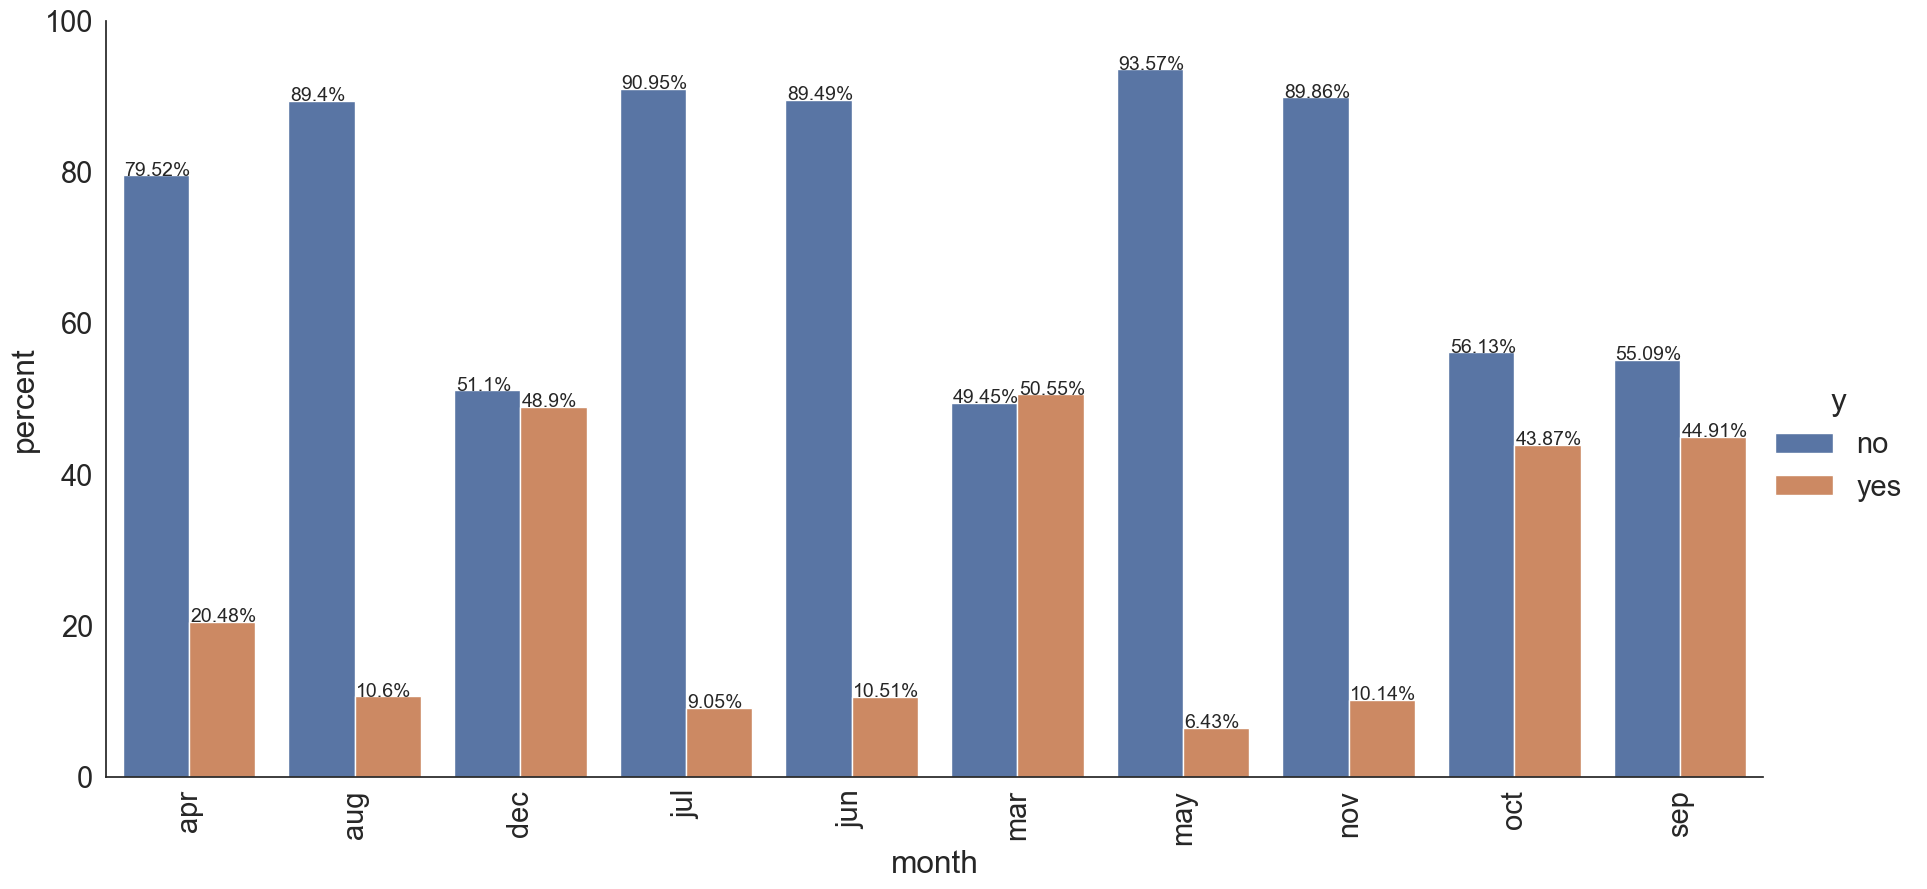

In [286]:
x,y = 'month', 'y'
sns.set_theme(style = "white", font_scale= 1.9)
df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=9,aspect=2)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x+0.01,txt_y+0.01,txt,fontsize=14)
    plt.xticks(rotation=90)

* Are there differences in the success rates of marketing campaigns vary across martial status?

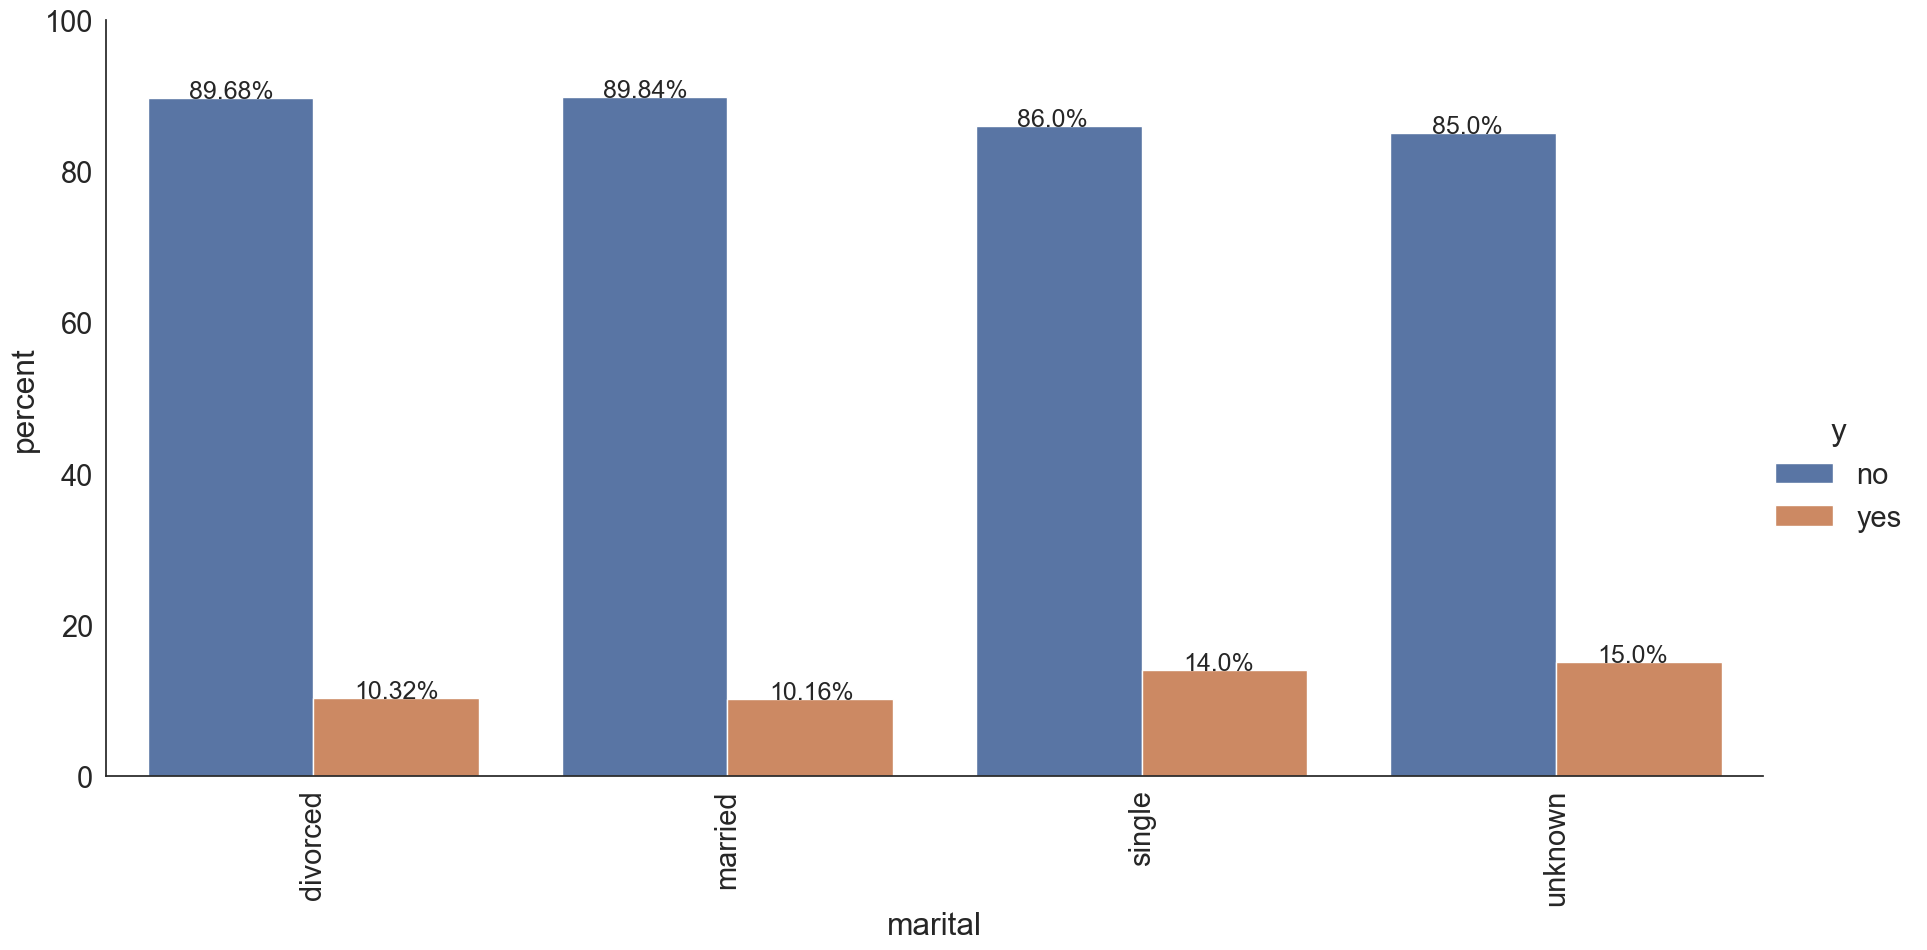

In [287]:
x,y = 'marital', 'y'
sns.set_theme(style = "white", font_scale= 1.9)
df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=9,aspect=2)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x+0.1,txt_y,txt,fontsize=18)
    plt.xticks(rotation=90)

## Data Preprocessing

## Checking null values

In [288]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Removing Duplicates Rows

In [289]:
data.duplicated().sum()

12

### There are 12 duplicate rows

In [290]:
data.drop_duplicates(inplace=True)

In [291]:
data.shape

(41176, 21)

In [292]:
#print(data.day_of_week.unique())

In [293]:
#data['month'] = data['month'].replace(['may','jun','jul','aug','oct','nov','dec','mar','apr','sep'],[5,6,7,8,10,11,12,3,4,9])

In [294]:
#data['day_of_week'] = data['day_of_week'].replace(['mon','tue','wed','thu','fri'],[1,2,3,4,5])

In [295]:
#data['date']=data['day_of_week'].map(str)+'-'+data['month'].map(str)

In [296]:
#data=data.drop(['day_of_week','month'], axis='columns')

In [297]:
#data.head()

## Label Encoding
Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form

In [298]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [299]:
# Encode labels in column 'species'.
features=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
for f in features:
    data[f]=label_encoder.fit_transform(data[f])

In [300]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,5,1,5,0,2,0,0,7,0,...,3,999,1,0,-1.1,94.767,-50.8,1.028,4963.6,0


## Correlation of success marketing campaigns with features

<AxesSubplot:>

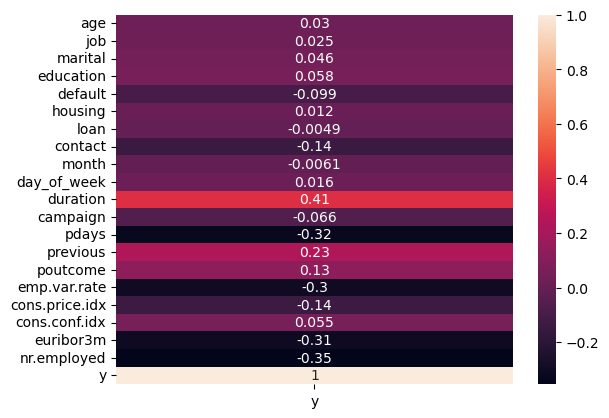

In [301]:
plt.style.use('default')
corr = data.corr()[['y']]
sns.heatmap(corr, annot=True)

## Separate Features and Target

In [126]:
Features=data.iloc[:,0:20]
Label=data[['y']]

## Data Normalization
The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model.

We are using **MinMaxScaler**

In [127]:
sca = preprocessing.MinMaxScaler()

In [128]:
sca.fit(Features)
Features=sca.transform(Features)

In [129]:
Features

array([[0.48148148, 0.27272727, 0.33333333, ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.63636364, 0.33333333, ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.63636364, 0.33333333, ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.45454545, 0.33333333, ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.81818182, 0.33333333, ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.45454545, 0.33333333, ..., 0.        , 0.08932215,
        0.        ]])

### Features

In [195]:
Features.shape

(41176, 20)

### Labels

In [196]:
Label.shape

(41176, 1)

In [197]:
Label.head()

,y
0,0
1,0
2,0
3,0
4,0


### We will be using Chi square test for feature selection

In [198]:
chi2_val, p_val = chi2(Features, Label)

In [199]:
print(chi2_val)

[2.21286316e+00 8.27824414e+00 9.28149256e+00 2.39209338e+01
 1.60945551e+02 2.51500769e+00 7.97408142e-01 5.47778461e+02
 2.13089623e-01 2.55840686e+00 3.57984549e+02 1.61376148e+01
 1.58015941e+02 4.41387744e+02 4.91316649e+01 5.40921063e+02
 7.24788534e+01 1.07614194e+01 8.90235155e+02 5.02482724e+02]


In [200]:
print(p_val)

[1.36864449e-001 4.01229100e-003 2.31480733e-003 1.00374338e-006
 7.03170414e-037 1.12767083e-001 3.71869424e-001 3.83060036e-121
 6.44356492e-001 1.09709090e-001 7.73474400e-080 5.89024783e-005
 3.07013724e-036 5.40033413e-098 2.39345143e-012 1.18865943e-119
 1.68831386e-017 1.03637872e-003 1.30194787e-195 2.74019987e-111]


p_value for all feature is close to zero which means all features are important

### Split train_test Data

In [201]:
x_train,x_test,y_train,y_test=train_test_split(Features,Label,test_size=0.20,random_state=12)

In [202]:
print(f'Shape of X_train {x_train.shape}, y_train {y_train.shape}, X_test {x_test.shape} and y_test {y_test.shape}')

Shape of X_train (32940, 20), y_train (32940, 1), X_test (8236, 20) and y_test (8236, 1)


### ravel() function returns the flattened underlying data as an ndarray

In [203]:
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

# Model Training

## Bgging Classifier

In [241]:
def Objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_samples = trial.suggest_float('max_samples', 0.1, 1)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)
    
    clf = BaggingClassifier(
        base_estimator=BaggingClassifier(max_samples=max_samples, max_features=max_features),
        n_estimators=n_estimators,
        random_state=42
    )
    
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test,pred_labels)
    return accuracy

In [242]:
study = optuna.create_study(direction='maximize')
study.optimize(Objective, n_trials=100)

[I 2023-03-29 02:15:15,463] A new study created in memory with name: no-name-2d242f1d-80d7-49c8-8595-54957a1db2a7
[I 2023-03-29 02:16:00,729] Trial 0 finished with value: 0.921321029626032 and parameters: {'n_estimators': 94, 'max_samples': 0.9165227376283748, 'max_features': 0.8629908359720759}. Best is trial 0 with value: 0.921321029626032.
[I 2023-03-29 02:16:11,912] Trial 1 finished with value: 0.911486158329286 and parameters: {'n_estimators': 96, 'max_samples': 0.198119135332683, 'max_features': 0.45190168243196494}. Best is trial 0 with value: 0.921321029626032.
[I 2023-03-29 02:16:19,210] Trial 2 finished with value: 0.9169499757163672 and parameters: {'n_estimators': 19, 'max_samples': 0.8300280847804066, 'max_features': 0.7379706300783331}. Best is trial 0 with value: 0.921321029626032.
[I 2023-03-29 02:16:30,548] Trial 3 finished with value: 0.9194997571636717 and parameters: {'n_estimators': 40, 'max_samples': 0.4107483338970893, 'max_features': 0.8634354745828374}. Best is

[I 2023-03-29 02:28:36,979] Trial 33 finished with value: 0.9173142302088393 and parameters: {'n_estimators': 39, 'max_samples': 0.655988687338138, 'max_features': 0.7432602232877212}. Best is trial 12 with value: 0.9215638659543468.
[I 2023-03-29 02:29:02,592] Trial 34 finished with value: 0.9193783389995144 and parameters: {'n_estimators': 60, 'max_samples': 0.6411524435166795, 'max_features': 0.9587455073412028}. Best is trial 12 with value: 0.9215638659543468.
[I 2023-03-29 02:29:43,418] Trial 35 finished with value: 0.9205925206410879 and parameters: {'n_estimators': 91, 'max_samples': 0.8158578182666884, 'max_features': 0.8848515265155913}. Best is trial 12 with value: 0.9215638659543468.
[I 2023-03-29 02:29:54,432] Trial 36 finished with value: 0.9173142302088393 and parameters: {'n_estimators': 24, 'max_samples': 0.8400894066595717, 'max_features': 0.8772889764046009}. Best is trial 12 with value: 0.9215638659543468.
[I 2023-03-29 02:30:21,304] Trial 37 finished with value: 0.9

[I 2023-03-29 02:46:27,622] Trial 67 finished with value: 0.9211996114618747 and parameters: {'n_estimators': 37, 'max_samples': 0.7204835080742965, 'max_features': 0.9025828410671487}. Best is trial 60 with value: 0.9221709567751336.
[I 2023-03-29 02:46:49,045] Trial 68 finished with value: 0.9207139388052452 and parameters: {'n_estimators': 47, 'max_samples': 0.7466253634685525, 'max_features': 0.9453020833185486}. Best is trial 60 with value: 0.9221709567751336.
[I 2023-03-29 02:47:10,034] Trial 69 finished with value: 0.9198640116561437 and parameters: {'n_estimators': 53, 'max_samples': 0.6759872623033352, 'max_features': 0.8716301259066661}. Best is trial 60 with value: 0.9221709567751336.
[I 2023-03-29 02:47:21,074] Trial 70 finished with value: 0.9186498300145702 and parameters: {'n_estimators': 30, 'max_samples': 0.6342670346934852, 'max_features': 0.8287026970341205}. Best is trial 60 with value: 0.9221709567751336.
[I 2023-03-29 02:47:43,223] Trial 71 finished with value: 0.

In [243]:
vis.plot_optimization_history(study)

In [ ]:
print(f'best trial: {study.best_trial.number}, best param: {study.best_params}, best_value: {study.best_value}')

## AdaBoost Classifier

In [245]:
def Objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1)
    clf = AdaBoostClassifier(n_estimators=n_estimators,learning_rate=learning_rate, random_state=0)
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy

In [246]:
study = optuna.create_study(direction='maximize')
study.optimize(Objective, n_trials=100)

[I 2023-03-29 03:03:02,487] A new study created in memory with name: no-name-ee1d3752-3b84-4c3f-9441-fb3d31de254e
[I 2023-03-29 03:03:03,118] Trial 0 finished with value: 0.90808644973288 and parameters: {'n_estimators': 30, 'max_samples': 0.884806214351305}. Best is trial 0 with value: 0.90808644973288.
[I 2023-03-29 03:03:04,488] Trial 1 finished with value: 0.9095434677027683 and parameters: {'n_estimators': 70, 'max_samples': 0.4444821985252071}. Best is trial 1 with value: 0.9095434677027683.
[I 2023-03-29 03:03:06,092] Trial 2 finished with value: 0.9103933948518699 and parameters: {'n_estimators': 82, 'max_samples': 0.7065827732318041}. Best is trial 2 with value: 0.9103933948518699.
[I 2023-03-29 03:03:07,061] Trial 3 finished with value: 0.8954589606605148 and parameters: {'n_estimators': 47, 'max_samples': 0.02928748418219522}. Best is trial 2 with value: 0.9103933948518699.
[I 2023-03-29 03:03:07,338] Trial 4 finished with value: 0.8954589606605148 and parameters: {'n_estima

[I 2023-03-29 03:04:00,986] Trial 39 finished with value: 0.9106362311801846 and parameters: {'n_estimators': 88, 'max_samples': 0.8569241718054529}. Best is trial 13 with value: 0.9113647401651287.
[I 2023-03-29 03:04:02,920] Trial 40 finished with value: 0.9089363768819816 and parameters: {'n_estimators': 96, 'max_samples': 0.517651990518329}. Best is trial 13 with value: 0.9113647401651287.
[I 2023-03-29 03:04:04,605] Trial 41 finished with value: 0.9110004856726567 and parameters: {'n_estimators': 84, 'max_samples': 0.9445308456305026}. Best is trial 13 with value: 0.9113647401651287.
[I 2023-03-29 03:04:06,299] Trial 42 finished with value: 0.9113647401651287 and parameters: {'n_estimators': 85, 'max_samples': 0.9408136947102801}. Best is trial 13 with value: 0.9113647401651287.
[I 2023-03-29 03:04:08,168] Trial 43 finished with value: 0.9113647401651287 and parameters: {'n_estimators': 83, 'max_samples': 0.9493860963085364}. Best is trial 13 with value: 0.9113647401651287.
[I 202

[I 2023-03-29 03:05:11,202] Trial 78 finished with value: 0.9122146673142302 and parameters: {'n_estimators': 81, 'max_samples': 0.9726055846522901}. Best is trial 78 with value: 0.9122146673142302.
[I 2023-03-29 03:05:13,052] Trial 79 finished with value: 0.9110004856726567 and parameters: {'n_estimators': 85, 'max_samples': 0.9787179813615404}. Best is trial 78 with value: 0.9122146673142302.
[I 2023-03-29 03:05:14,749] Trial 80 finished with value: 0.9112433220009714 and parameters: {'n_estimators': 82, 'max_samples': 0.9076886539548943}. Best is trial 78 with value: 0.9122146673142302.
[I 2023-03-29 03:05:16,314] Trial 81 finished with value: 0.9112433220009714 and parameters: {'n_estimators': 76, 'max_samples': 0.8720875470022107}. Best is trial 78 with value: 0.9122146673142302.
[I 2023-03-29 03:05:18,000] Trial 82 finished with value: 0.9122146673142302 and parameters: {'n_estimators': 81, 'max_samples': 0.9726385212238997}. Best is trial 78 with value: 0.9122146673142302.
[I 20

In [247]:
vis.plot_optimization_history(study)

In [ ]:
print(f'best trial: {study.best_trial.number}, best param: {study.best_params}, best_value: {study.best_value}')

## GradientBoostingClassifier

In [248]:
def Objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    learning_rate = trial.suggest_float('max_samples', 0.01, 1)
    min_samples_split=trial.suggest_int('min_samples_split',2,10)
    min_samples_leaf=trial.suggest_int('min_samples_leaf',1,6)
    
    clf = GradientBoostingClassifier(n_estimators=n_estimators,learning_rate=learning_rate,min_samples_split=min_samples_split
                             ,min_samples_leaf=min_samples_leaf,random_state=0)
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy

In [249]:
study = optuna.create_study(direction='maximize')
study.optimize(Objective, n_trials=100)

[I 2023-03-29 03:06:54,709] A new study created in memory with name: no-name-db89a432-f6ed-4fab-bb93-577849121210
[I 2023-03-29 03:06:57,128] Trial 0 finished with value: 0.9165857212238951 and parameters: {'n_estimators': 72, 'max_samples': 0.9681254135078539, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9165857212238951.
[I 2023-03-29 03:06:58,960] Trial 1 finished with value: 0.9194997571636717 and parameters: {'n_estimators': 55, 'max_samples': 0.13750770215676972, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9194997571636717.
[I 2023-03-29 03:07:01,883] Trial 2 finished with value: 0.919621175327829 and parameters: {'n_estimators': 90, 'max_samples': 0.1541069236553839, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.919621175327829.
[I 2023-03-29 03:07:03,776] Trial 3 finished with value: 0.9181641573579408 and parameters: {'n_estimators': 56, 'max_samples': 0.1084940252814501, 'min_s

[I 2023-03-29 03:08:07,865] Trial 32 finished with value: 0.9181641573579408 and parameters: {'n_estimators': 76, 'max_samples': 0.10185335568373963, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 31 with value: 0.9207139388052452.
[I 2023-03-29 03:08:10,235] Trial 33 finished with value: 0.9194997571636717 and parameters: {'n_estimators': 72, 'max_samples': 0.134649110285313, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 31 with value: 0.9207139388052452.
[I 2023-03-29 03:08:13,344] Trial 34 finished with value: 0.9181641573579408 and parameters: {'n_estimators': 94, 'max_samples': 0.08623229972289581, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 31 with value: 0.9207139388052452.
[I 2023-03-29 03:08:15,252] Trial 35 finished with value: 0.9177999028654686 and parameters: {'n_estimators': 59, 'max_samples': 0.07072849118559349, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 31 with value: 0.9207139388052452.
[I 2023-03-2

[I 2023-03-29 03:09:41,268] Trial 64 finished with value: 0.9190140845070423 and parameters: {'n_estimators': 90, 'max_samples': 0.09107513075596076, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 46 with value: 0.9211996114618747.
[I 2023-03-29 03:09:42,178] Trial 65 finished with value: 0.9068722680913065 and parameters: {'n_estimators': 27, 'max_samples': 0.05128526403623873, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 46 with value: 0.9211996114618747.
[I 2023-03-29 03:09:44,828] Trial 66 finished with value: 0.9194997571636717 and parameters: {'n_estimators': 80, 'max_samples': 0.16359396570119283, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 46 with value: 0.9211996114618747.
[I 2023-03-29 03:09:48,073] Trial 67 finished with value: 0.9185284118504128 and parameters: {'n_estimators': 100, 'max_samples': 0.24104105872507192, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 46 with value: 0.9211996114618747.
[I 2023-03-

[I 2023-03-29 03:11:12,028] Trial 96 finished with value: 0.9187712481787276 and parameters: {'n_estimators': 81, 'max_samples': 0.10733902003585323, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 46 with value: 0.9211996114618747.
[I 2023-03-29 03:11:14,815] Trial 97 finished with value: 0.9197425934919864 and parameters: {'n_estimators': 85, 'max_samples': 0.1605258914314586, 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 46 with value: 0.9211996114618747.
[I 2023-03-29 03:11:17,657] Trial 98 finished with value: 0.9141573579407479 and parameters: {'n_estimators': 86, 'max_samples': 0.026486272941808164, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 46 with value: 0.9211996114618747.
[I 2023-03-29 03:11:20,556] Trial 99 finished with value: 0.9190140845070423 and parameters: {'n_estimators': 90, 'max_samples': 0.20541555866100514, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 46 with value: 0.9211996114618747.


In [250]:
vis.plot_optimization_history(study)

In [272]:
print(f'best trial: {study.best_trial.number}, best param: {study.best_params}, best_value: {study.best_value}')

best trial: 129, best param: {'n_estimators': 63, 'max_depth': 12}, best_value: 0.9286299126637555


## RandomForestClassifier

In [251]:
def Objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    
    clf = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth)
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy

In [252]:
study = optuna.create_study(direction='maximize')
study.optimize(Objective, n_trials=100)

[I 2023-03-29 03:11:48,885] A new study created in memory with name: no-name-a6ffe767-26db-4160-9a0f-6fab3128dac5
[I 2023-03-29 03:11:49,111] Trial 0 finished with value: 0.9043224866440019 and parameters: {'n_estimators': 27, 'max_depth': 3}. Best is trial 0 with value: 0.9043224866440019.
[I 2023-03-29 03:11:49,857] Trial 1 finished with value: 0.9177999028654686 and parameters: {'n_estimators': 33, 'max_depth': 16}. Best is trial 1 with value: 0.9177999028654686.
[I 2023-03-29 03:11:50,496] Trial 2 finished with value: 0.9069936862554638 and parameters: {'n_estimators': 58, 'max_depth': 5}. Best is trial 1 with value: 0.9177999028654686.
[I 2023-03-29 03:11:51,207] Trial 3 finished with value: 0.9188926663428849 and parameters: {'n_estimators': 31, 'max_depth': 18}. Best is trial 3 with value: 0.9188926663428849.
[I 2023-03-29 03:11:52,007] Trial 4 finished with value: 0.9129431762991743 and parameters: {'n_estimators': 59, 'max_depth': 7}. Best is trial 3 with value: 0.918892666342

[I 2023-03-29 03:12:43,732] Trial 42 finished with value: 0.9201068479844585 and parameters: {'n_estimators': 67, 'max_depth': 15}. Best is trial 36 with value: 0.9221709567751336.
[I 2023-03-29 03:12:45,428] Trial 43 finished with value: 0.9184069936862554 and parameters: {'n_estimators': 75, 'max_depth': 17}. Best is trial 36 with value: 0.9221709567751336.
[I 2023-03-29 03:12:45,889] Trial 44 finished with value: 0.9198640116561437 and parameters: {'n_estimators': 22, 'max_depth': 13}. Best is trial 36 with value: 0.9221709567751336.
[I 2023-03-29 03:12:46,983] Trial 45 finished with value: 0.9177999028654686 and parameters: {'n_estimators': 68, 'max_depth': 9}. Best is trial 36 with value: 0.9221709567751336.
[I 2023-03-29 03:12:47,837] Trial 46 finished with value: 0.9203496843127732 and parameters: {'n_estimators': 43, 'max_depth': 12}. Best is trial 36 with value: 0.9221709567751336.
[I 2023-03-29 03:12:48,859] Trial 47 finished with value: 0.9176784847013113 and parameters: {'n

[I 2023-03-29 03:13:52,653] Trial 85 finished with value: 0.917557066537154 and parameters: {'n_estimators': 52, 'max_depth': 10}. Best is trial 67 with value: 0.9231423020883924.
[I 2023-03-29 03:13:54,391] Trial 86 finished with value: 0.921321029626032 and parameters: {'n_estimators': 89, 'max_depth': 12}. Best is trial 67 with value: 0.9231423020883924.
[I 2023-03-29 03:13:55,812] Trial 87 finished with value: 0.9190140845070423 and parameters: {'n_estimators': 62, 'max_depth': 17}. Best is trial 67 with value: 0.9231423020883924.
[I 2023-03-29 03:13:56,468] Trial 88 finished with value: 0.9191355026711996 and parameters: {'n_estimators': 32, 'max_depth': 13}. Best is trial 67 with value: 0.9231423020883924.
[I 2023-03-29 03:13:56,681] Trial 89 finished with value: 0.9181641573579408 and parameters: {'n_estimators': 10, 'max_depth': 11}. Best is trial 67 with value: 0.9231423020883924.
[I 2023-03-29 03:13:58,346] Trial 90 finished with value: 0.9186498300145702 and parameters: {'n_

In [253]:
vis.plot_optimization_history(study)

In [270]:
print(f'best trial: {study.best_trial.number}, best param: {study.best_params}, best_value: {study.best_value}')

best trial: 129, best param: {'n_estimators': 63, 'max_depth': 12}, best_value: 0.9286299126637555


### Confusion Matrix

In [254]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.rcParams["figure.figsize"] = (40,15)
    # update the overall font size
    plt.rcParams.update({'font.size':25})
    plt.labelsize=100
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=90)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float'/cm.sum(axis=1))[:,np.newaxis]
        print("normalize confusion matrix" )
    else:
        print("Confusion matrix, without normalization")
    print(cm)
    
    thresh=cm.max()/2
    for i,j in it.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

# OverSampling

In [255]:
smote = SMOTE(random_state=42)
x_train, y_train= smote.fit_resample(x_train, y_train)
x_test, y_test= smote.fit_resample(x_test, y_test)

In [256]:
print(f'Shape of X_train {x_train.shape}, y_train {y_train.shape}, X_test {x_test.shape} and y_test {y_test.shape}')

Shape of X_train (58418, 20), y_train (58418,), X_test (14656, 20) and y_test (14656,)


## Bagging Classifier

In [257]:
clf = BaggingClassifier(
        base_estimator=BaggingClassifier(max_samples=0.7639244102369217, max_features=0.9900257548554758),
        n_estimators=45,random_state=42)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
pred_labels = np.rint(preds)

Confusion matrix, without normalization
[[6763  565]
 [ 430 6898]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7328
           1       0.92      0.94      0.93      7328

    accuracy                           0.93     14656
   macro avg       0.93      0.93      0.93     14656
weighted avg       0.93      0.93      0.93     14656



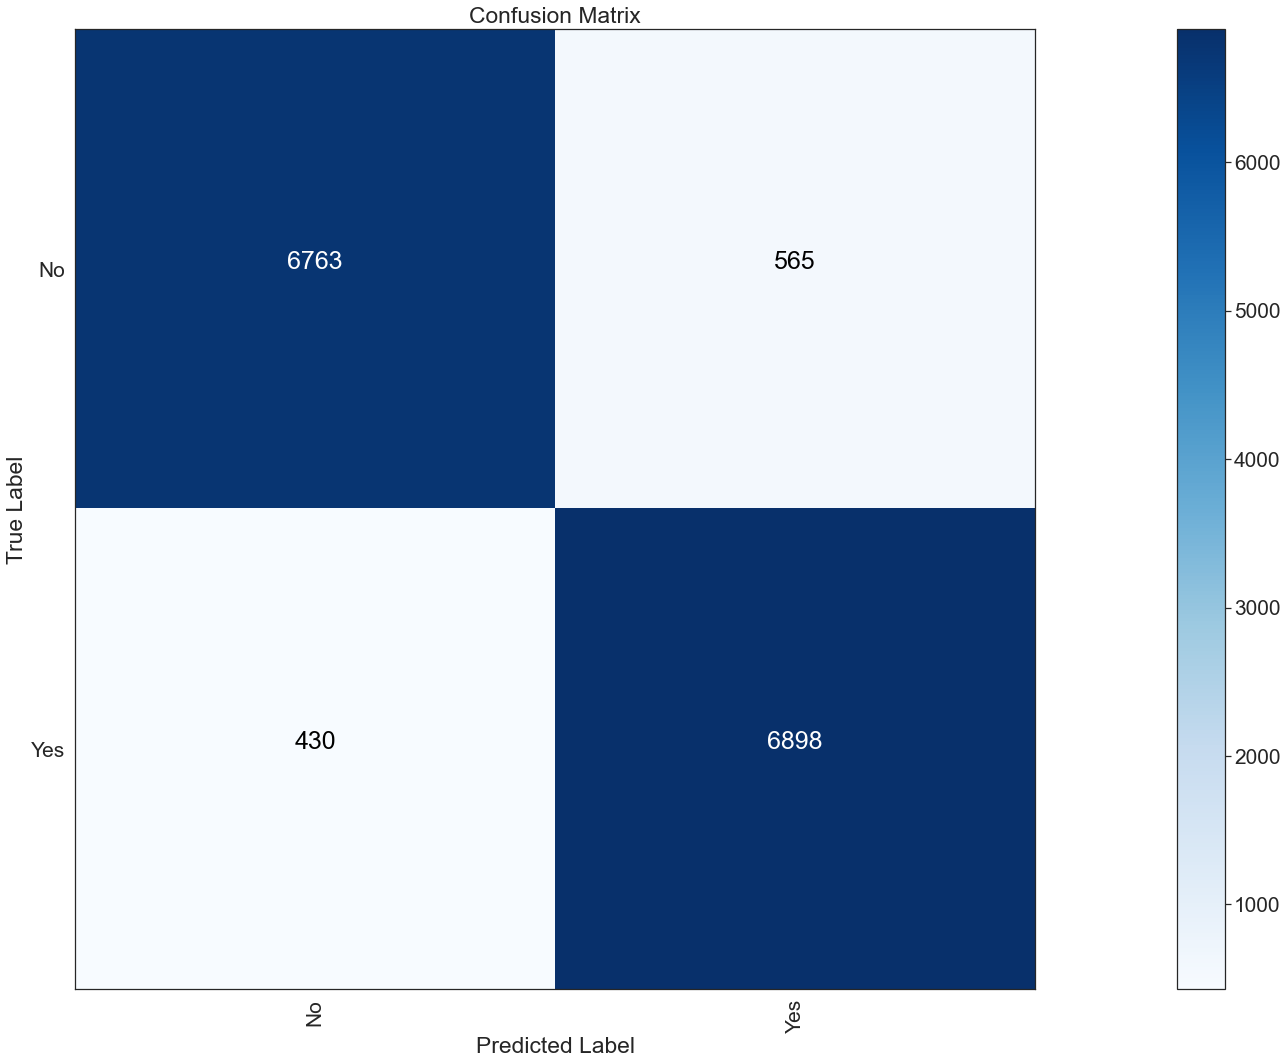

In [258]:
cm=confusion_matrix(y_test,pred_labels)
cm_plot_labels=['No','Yes']
plot_confusion_matrix(cm,cm_plot_labels,title="Confusion Matrix")
print(classification_report(y_test,pred_labels))

## AdaBoostClassifier

In [260]:
clf = AdaBoostClassifier(n_estimators=81,learning_rate=0.9726055846522901, random_state=0)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
pred_labels = np.rint(preds)

Confusion matrix, without normalization
[[6728  600]
 [ 445 6883]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7328
           1       0.92      0.94      0.93      7328

    accuracy                           0.93     14656
   macro avg       0.93      0.93      0.93     14656
weighted avg       0.93      0.93      0.93     14656



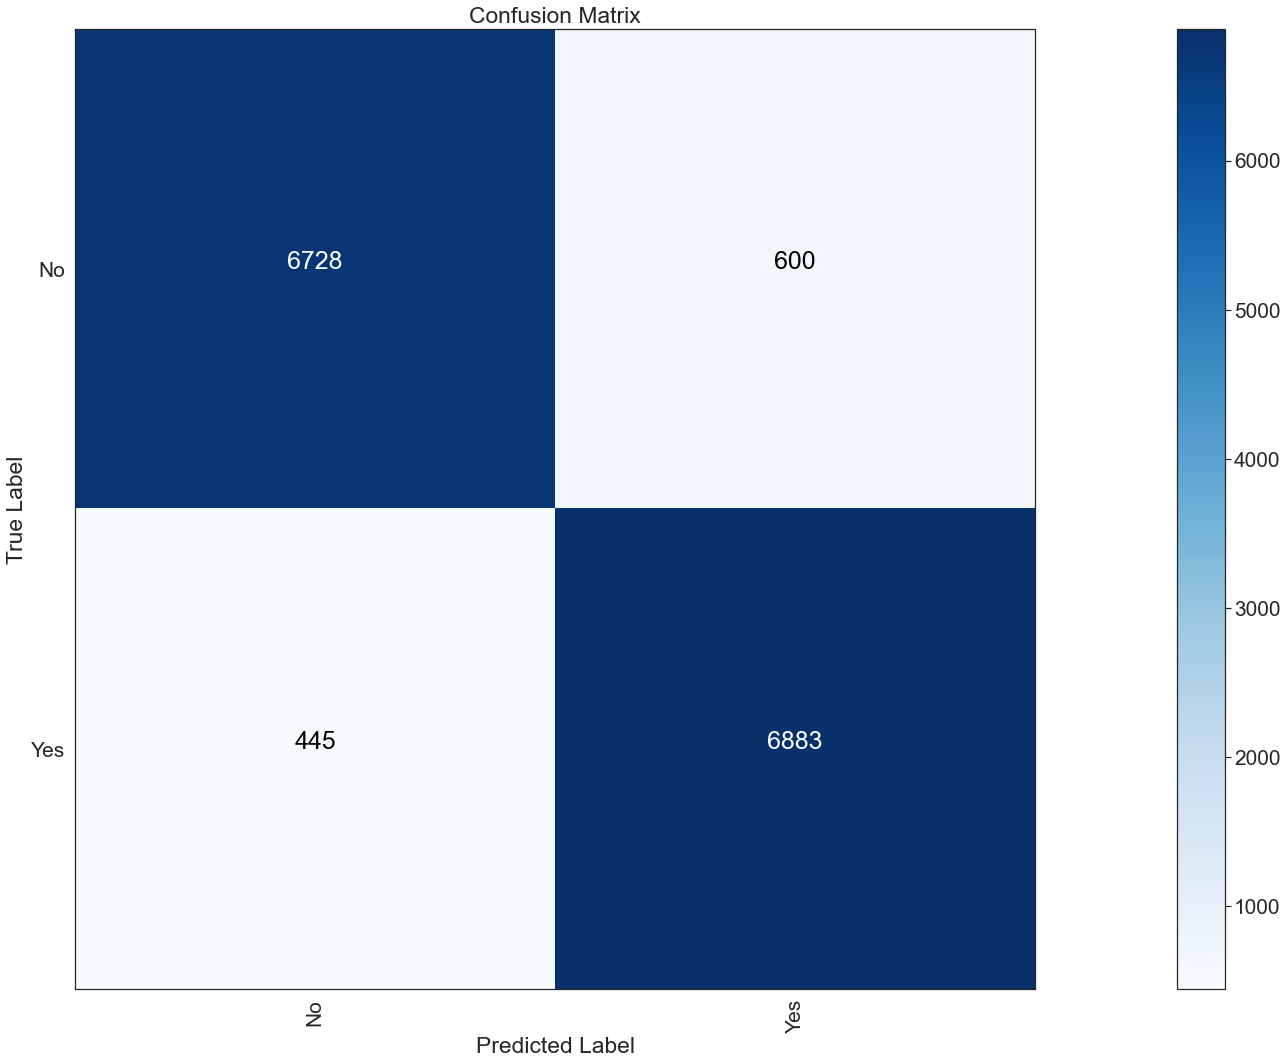

In [261]:
cm=confusion_matrix(y_test,pred_labels)
cm_plot_labels=['No','Yes']
plot_confusion_matrix(cm,cm_plot_labels,title="Confusion Matrix")
print(classification_report(y_test,pred_labels))

## GradientBoostingClassifier

In [262]:
clf = GradientBoostingClassifier(n_estimators=96,learning_rate=0.19993877540190944,min_samples_split=9
                             ,min_samples_leaf=6,random_state=0)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
pred_labels = np.rint(preds)
accuracy = accuracy_score(y_test, pred_labels)

Confusion matrix, without normalization
[[6818  510]
 [ 303 7025]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7328
           1       0.93      0.96      0.95      7328

    accuracy                           0.94     14656
   macro avg       0.94      0.94      0.94     14656
weighted avg       0.94      0.94      0.94     14656



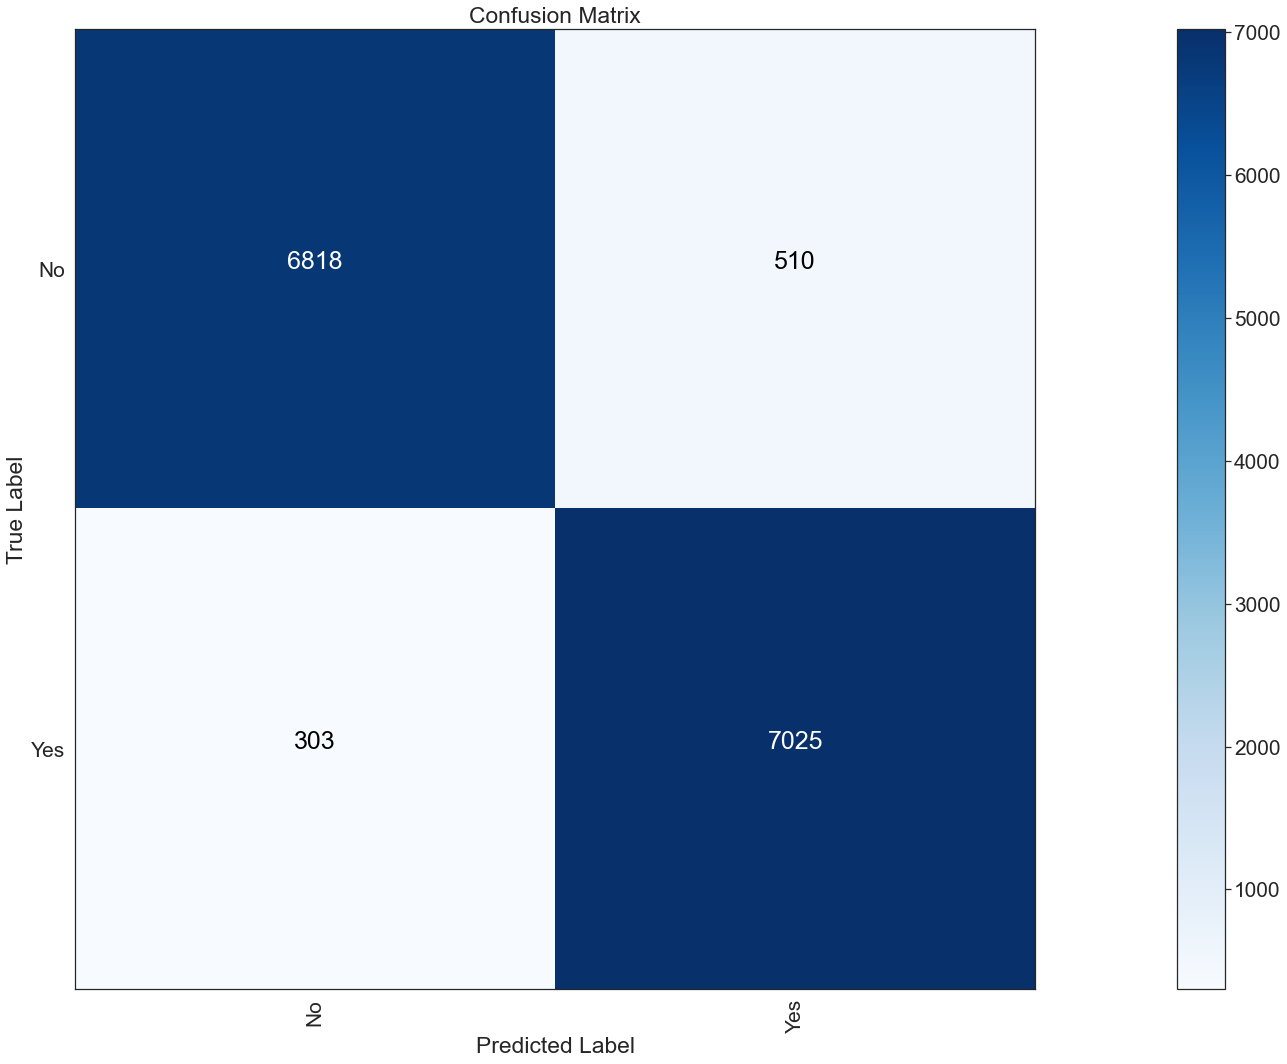

In [263]:
cm=confusion_matrix(y_test,pred_labels)
cm_plot_labels=['No','Yes']
plot_confusion_matrix(cm,cm_plot_labels,title="Confusion Matrix")
print(classification_report(y_test,pred_labels))

## RandomForestClassifier

In [264]:
clf = RandomForestClassifier(n_estimators=92,max_depth=12)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
pred_labels = np.rint(preds)
accuracy = accuracy_score(y_test, pred_labels)

Confusion matrix, without normalization
[[6554  774]
 [ 289 7039]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      7328
           1       0.90      0.96      0.93      7328

    accuracy                           0.93     14656
   macro avg       0.93      0.93      0.93     14656
weighted avg       0.93      0.93      0.93     14656



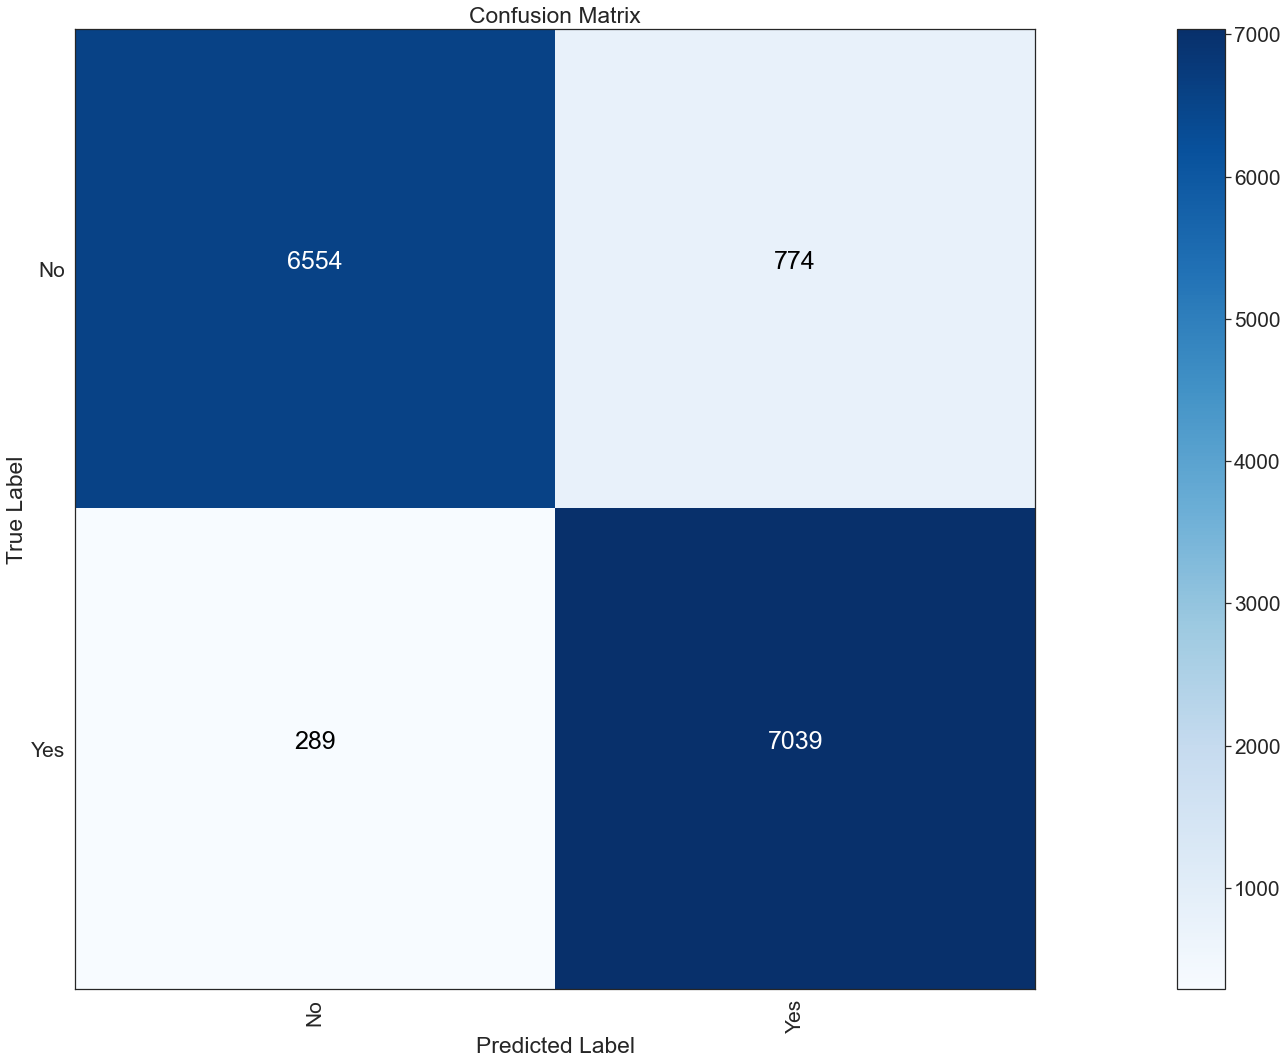

In [265]:
cm=confusion_matrix(y_test,pred_labels)
cm_plot_labels=['No','Yes']
plot_confusion_matrix(cm,cm_plot_labels,title="Confusion Matrix")
print(classification_report(y_test,pred_labels))